In [1]:
from similarity_plot_utils import *
from transforms import *

  0%|          | 0/466 [00:00<?, ?it/s]/share/pkg.7/pytorch/1.9.0/install/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|█████████▉| 465/466 [00:42<00:00, 10.98it/s]


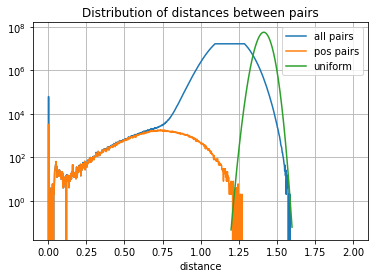

In [2]:
root = '/scratch/cliao25/sop/Stanford_Online_Products/'
testxform = SOP_get_xform(augmentation='bigtest')
normaltrainset = SOPDataset(root, 'train', transform=testxform)
loader =  torch.utils.data.DataLoader(normaltrainset, batch_size=128, num_workers=16, 
                                      pin_memory=True, shuffle=True, drop_last=False)
features, labels = get_features(model_path='SOP_hybrid.pt', 
                                loader=loader,
                                pt_folder='saved_models/')
bins, h_all, h_pos, xs, ys = get_hists(features, labels)
del features, labels

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


 24%|██▍       | 465/1955 [00:30<01:39, 15.02it/s]


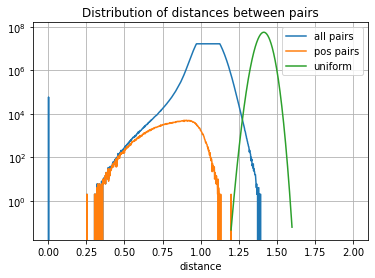

In [3]:
from sampling import Imagelist_iNat
root = '/scratch/cliao25/train_mini_resized/'
train_txt = 'iNaturalist_train.txt'
testxform = iNat_get_xform(augmentation='bigtest')
normaltrainset = Imagelist_iNat(image_list=train_txt, root=root, transform=testxform)
loader =  torch.utils.data.DataLoader(normaltrainset, batch_size=128, num_workers=16, 
                                      pin_memory=True, shuffle=True, drop_last=False)
features, labels = get_features(model_path='iNat_hybrid.pt',
                                loader=loader,
                                pt_folder='saved_models/')
bins, h_all, h_pos, xs, ys = get_hists(features, labels)
del features, labels